## Constants and settings
This cell is editable; feel free to reconfigure depending on the output you want.

In [1]:
n = 500 # range of time for the random walk: T = [0, n)
n_Bm = 1000 # range of time for the Brownian motion
show_plots = True
save_plots = False
colab = False # whether you are using the Google Colab setup (this changes how files are stored)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import os
if colab:
    from google.colab import files
np.random.seed(42)

### Settings

Use these to change the number of steps taken in the simulations, and how to output the resulting graphs.

In [3]:
output_path = "./output"
if save_plots and not os.path.exists(output_path):
    os.makedirs(output_path)
    os.makedirs(output_path + "/1d-random-walk")
    os.makedirs(output_path + "/2d-random-walk")
    os.makedirs(output_path + "/2d-random-walk/sim")
    os.makedirs(output_path + "/brownian-motion")

### One-Dimensional Random Walk
Simple random walk; simulation based on flipping a coin.

In [4]:
# generate the time interval (x-axis) and coin flips
time = np.arange(0, n)
coinflips = np.random.randint(0, 2, size=(n-1, )) # n-1 random steps, n total positions plotted
numheads = np.sum(coinflips)
coinflips[coinflips == 0] = -1
pos = np.concatenate(([0], np.cumsum(coinflips))) # start at zero

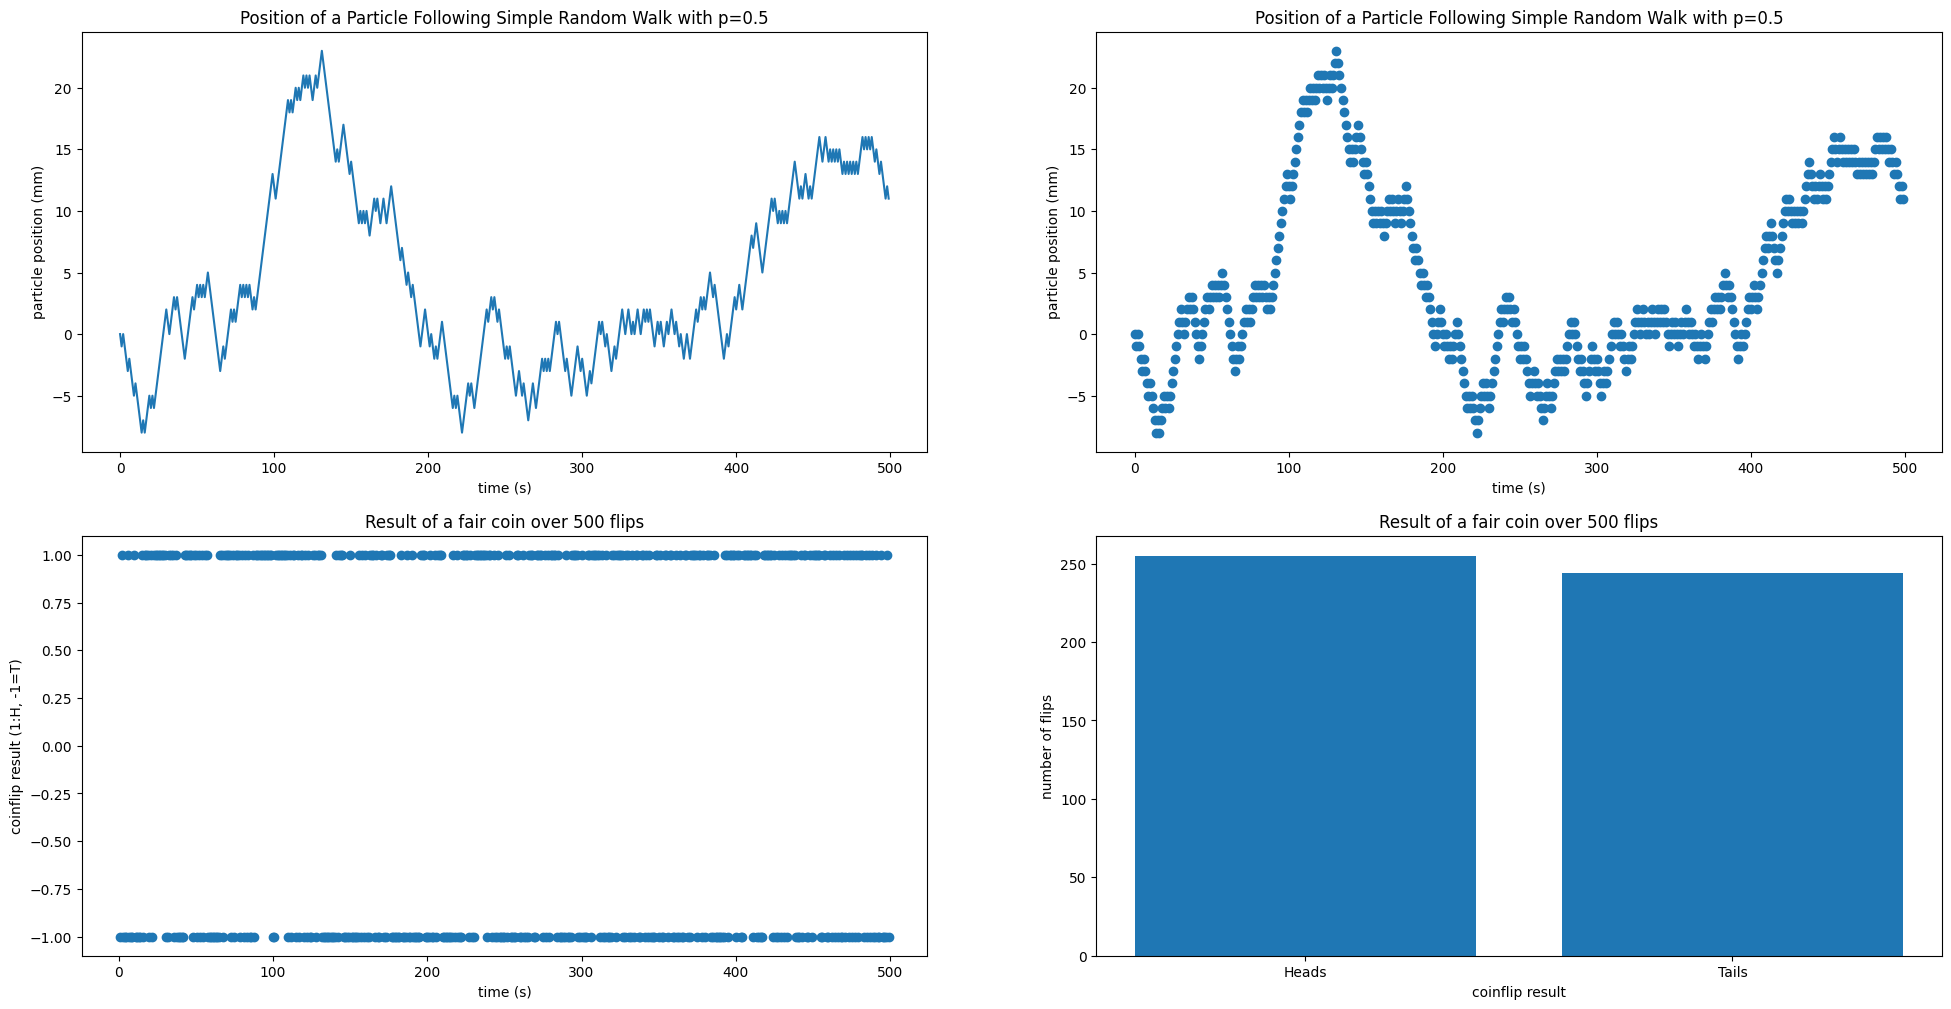

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 12))

# upper left: particle position over time
ax1.plot(time, pos)
ax1.set_xlabel("time (s)")
ax1.set_ylabel("particle position (mm)")
ax1.set_title("Position of a Particle Following Simple Random Walk with p=0.5")

# upper right: particle position over time
ax2.scatter(time, pos)
ax2.set_xlabel("time (s)")
ax2.set_ylabel("particle position (mm)")
ax2.set_title("Position of a Particle Following Simple Random Walk with p=0.5")

# lower left: coin flips over time
ax3.scatter(time[1:], coinflips)
ax3.set_xlabel("time (s)")
ax3.set_ylabel("coinflip result (1:H, -1=T)")
ax3.set_title("Result of a fair coin over {} flips".format(n))

# lower right: coin flip counts
ax4.bar(["Heads", "Tails"], [numheads, n-1-numheads])
ax4.set_xlabel("coinflip result")
ax4.set_ylabel("number of flips")
ax4.set_title("Result of a fair coin over {} flips".format(n))

if save_plots:
    plt.savefig(output_path + "/1d-random-walk/four-plots.png")
if show_plots:
    plt.show()

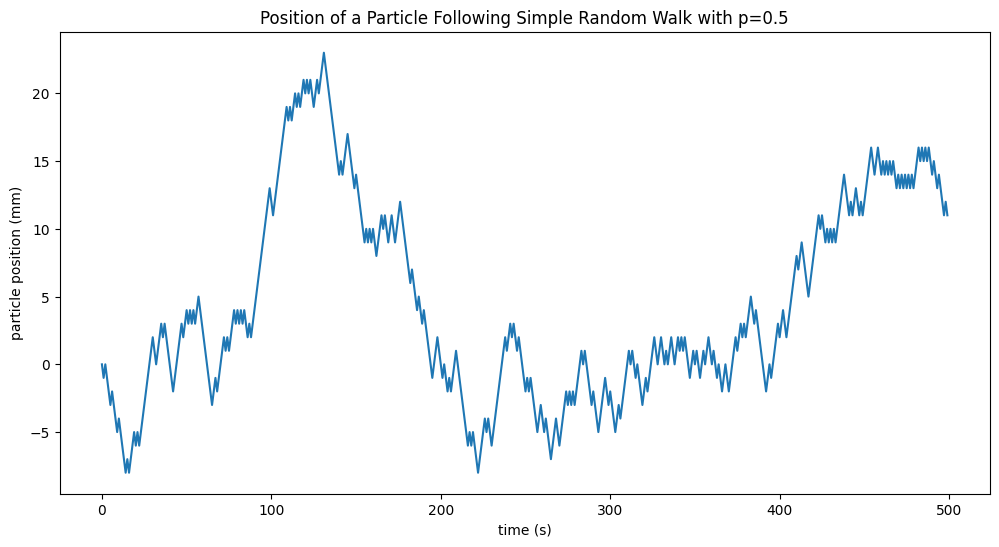

In [6]:
# larger version of the upper left plot above
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.plot(time, pos)
ax1.set_xlabel("time (s)")
ax1.set_ylabel("particle position (mm)")
ax1.set_title("Position of a Particle Following Simple Random Walk with p=0.5")

if save_plots:
    plt.savefig(output_path + "/1d-random-walk/one-plot.png")
if show_plots:
    plt.show()

In [7]:
# average h over time
avgpos = np.cumsum(pos, dtype=float) # running summed positions
avgpos = avgpos / (np.arange(n) + 1)

# average h^2 over time
sqdpos = pos * pos
avgsqdpos = np.cumsum(sqdpos, dtype=float) # running summed positions
avgsqdpos = avgsqdpos / (np.arange(n) + 1)

# dataframe for display as a table
avgpos_df = pd.DataFrame(np.transpose([time, avgpos, avgsqdpos]), columns=("timestamp", "running average position", "running average squared position"))
"""
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(avgpos_df.to_string(index=False))
"""
print(avgpos_df)

     timestamp  running average position  running average squared position
0          0.0                  0.000000                          0.000000
1          1.0                 -0.500000                          0.500000
2          2.0                 -0.333333                          0.333333
3          3.0                 -0.500000                          0.500000
4          4.0                 -0.800000                          1.200000
..         ...                       ...                               ...
495      495.0                  4.435484                         74.362903
496      496.0                  4.450704                         74.503018
497      497.0                  4.463855                         74.596386
498      498.0                  4.478958                         74.735471
499      499.0                  4.492000                         74.828000

[500 rows x 3 columns]


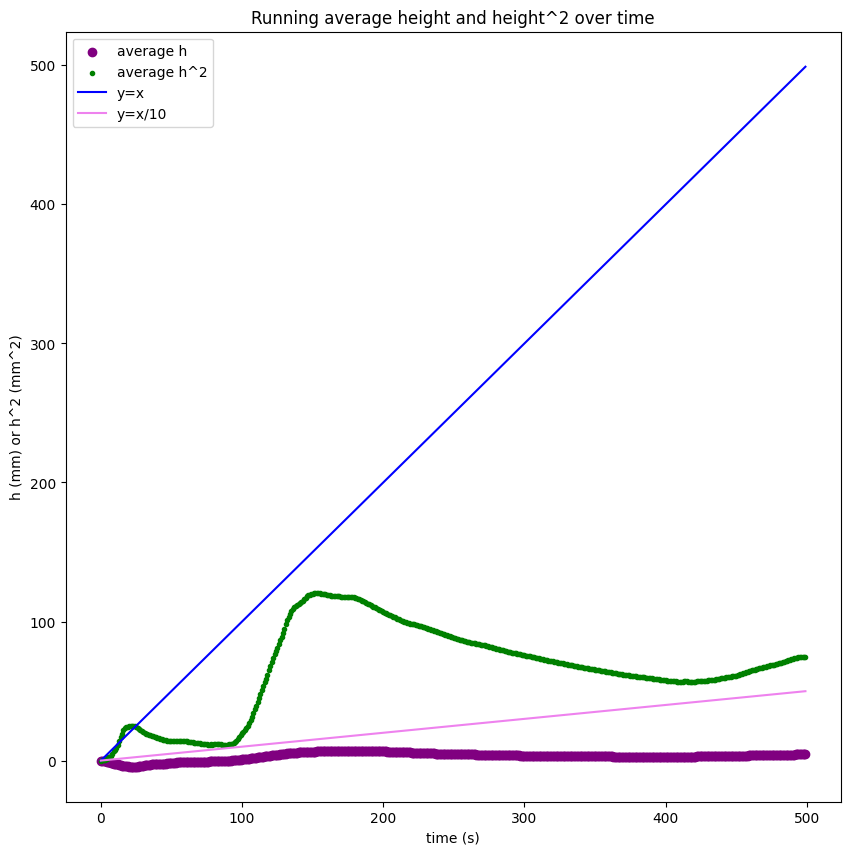

In [8]:
# plot the dataframe above
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(time, avgpos, label="average h", color="purple")
ax.scatter(time, avgsqdpos, label="average h^2", color="green", marker=".")
ax.plot(time, time, label="y=x", color="blue")
ax.plot(time, time/10, label="y=x/10", color="violet")
ax.set_xlabel("time (s)")
ax.set_ylabel("h (mm) or h^2 (mm^2)")
ax.set_title("Running average height and height^2 over time")
ax.legend()

if save_plots:
    plt.savefig(output_path + "/1d-random-walk/avg-height.png")
if show_plots:
    plt.show()

Average of $h^2$ is the better measure, since it describes average squared *distance* as well as average squared *position*. In contrast, the average of $h$ describes only position, and can be close to zero even if the particle has spent a large part of the random walk far from the origin.

### Two-Dimensional Random Walk

Simple random walk; simulation based on rolling a four-sided die.

In [9]:
# generate the dice rolls
np.random.seed(42) # reset random seed
rolls = np.random.randint(1, 5, size=(n-1,1,))
dis = np.choose(rolls, [[0, 0], [-1, 0], [0, -1], [1, 0], [0, 1]]) # displacement
pos = np.concatenate(([[0, 0]], np.cumsum(dis, axis=0)), axis=0)

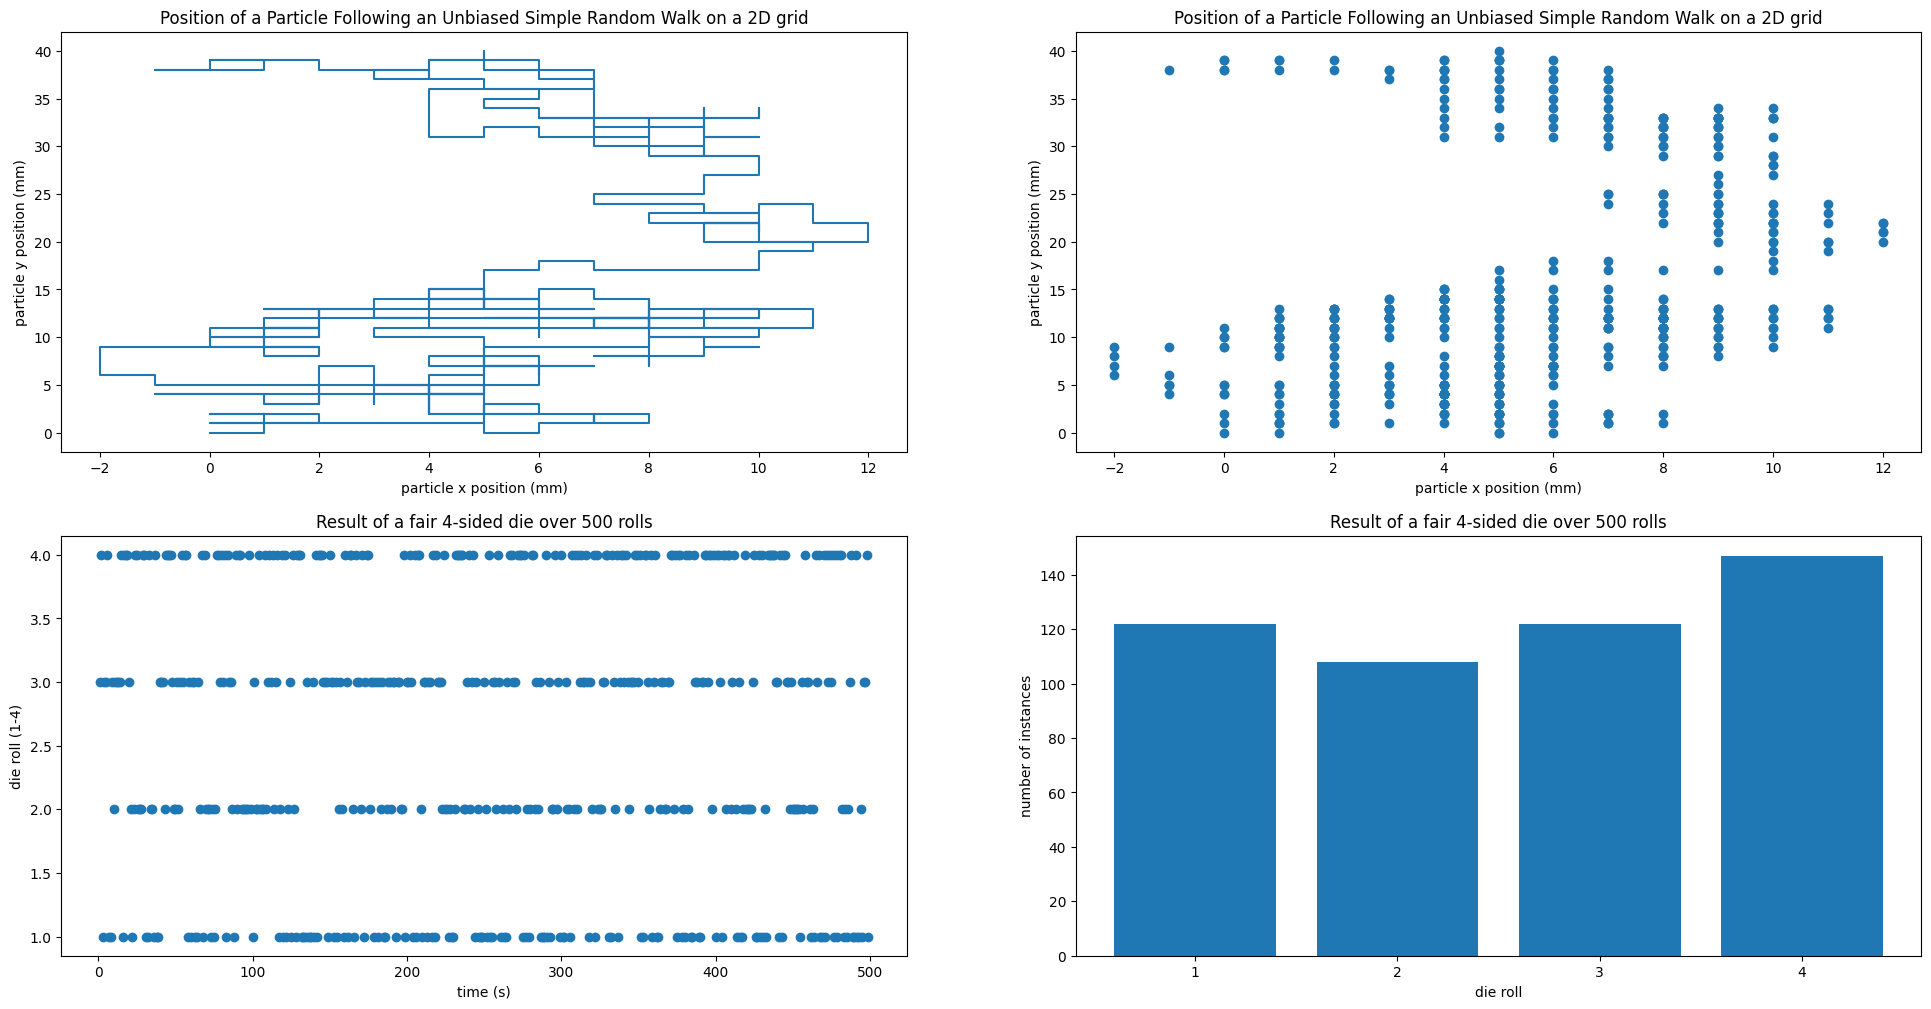

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 12))

# upper left: particle position over time
ax1.plot(np.transpose(pos)[0], np.transpose(pos)[1])
ax1.set_xlabel("particle x position (mm)")
ax1.set_ylabel("particle y position (mm)")
ax1.set_title("Position of a Particle Following an Unbiased Simple Random Walk on a 2D grid")


# upper right: particle position over time
ax2.scatter(np.transpose(pos)[0], np.transpose(pos)[1])
ax2.set_xlabel("particle x position (mm)")
ax2.set_ylabel("particle y position (mm)")
ax2.set_title("Position of a Particle Following an Unbiased Simple Random Walk on a 2D grid")


# lower left: dice rolls over time
ax3.scatter(time[1:], rolls)
ax3.set_xlabel("time (s)")
ax3.set_ylabel("die roll (1-4)")
ax3.set_title("Result of a fair 4-sided die over {} rolls".format(n))

# lower right: dice roll counts
ax4.bar(["1", "2", "3", "4"], [np.count_nonzero(rolls == 1), np.count_nonzero(rolls == 2), np.count_nonzero(rolls == 3), np.count_nonzero(rolls == 4)])
ax4.set_xlabel("die roll")
ax4.set_ylabel("number of instances")
ax4.set_title("Result of a fair 4-sided die over {} rolls".format(n))

if save_plots:
    plt.savefig(output_path + "/2d-random-walk/four-plots.png")
if show_plots:
    plt.show()

In [11]:
# to generate an animation of the random walk, we plot snapshots of the walk at each timestamp
# generating the animation itself in code can be a bit finicky, so I do it online instead
%%capture
for k in range(0, len(time)): # takes ~1 minute per 150 images on my machine
  fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
  ax1.plot(np.transpose(pos)[0][:k], np.transpose(pos)[1][:k])
  ax1.scatter(np.transpose(pos)[0][:k], np.transpose(pos)[1][:k])
  ax1.set_xlabel("particle x position (mm)")
  ax1.set_ylabel("particle y position (mm)")
  ax1.set_title("Position of a Particle Following an Unbiased Simple Random Walk on a 2D grid")
  ax1.scatter([0], [0], color="orange", label="start", s=100)
  if k > 1:
    ax1.scatter(pos[k-1][0], pos[k-1][1], color="red", label="end", s=100)
  fig.legend()

  if save_plots:
    if colab:
        files.download("2d-random-walk/sim/{}.png".format(k))
    else:
        plt.savefig(output_path + "/2d-random-walk/sim/{}.png".format(k))

# output cleared because there are 500 of them

In [12]:
# downloading lots of files at once from Google Colab is annoying, so we
# store it in a .zip file and download it for you
if colab:
    !zip -r /content/2d-random-walk.zip /content/2d-random-walk/
    files.download("/content/2d-random-walk.zip")

### Standard Brownian Motion

Also known as a Wiener process; simulation on the unit time interval.

In [13]:
# generate the time interval (x-axis) and steps (increments along the y-axis)
np.random.seed(42)
n = n_Bm # number of increments
time = np.arange(0, 1 + 1/n, 1/n)
inc = np.random.normal(size=(n,))
pos = np.concatenate(([0], np.cumsum(inc)))

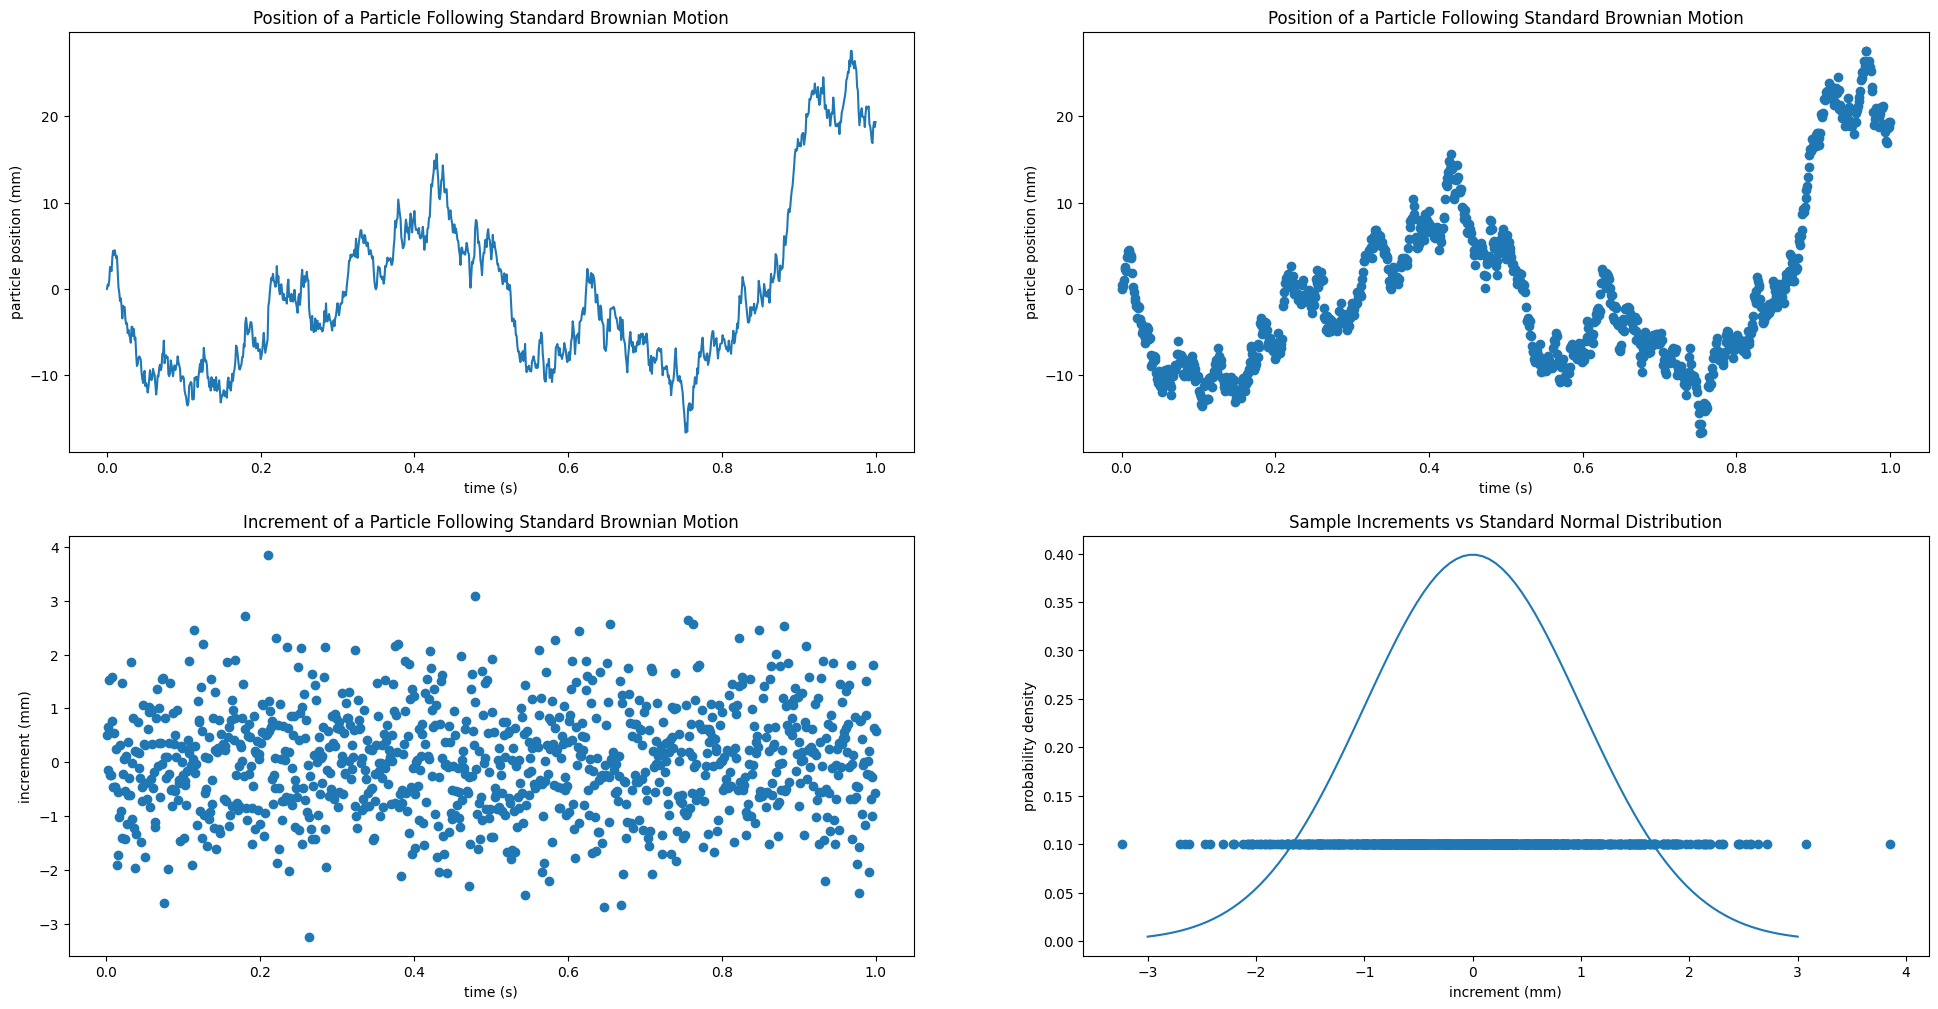

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 12))

# upper left: particle position over time
ax1.plot(time, pos)
ax1.set_xlabel("time (s)")
ax1.set_ylabel("particle position (mm)")
ax1.set_title("Position of a Particle Following Standard Brownian Motion")

# upper right: particle position over time
ax2.scatter(time, pos)
ax2.set_xlabel("time (s)")
ax2.set_ylabel("particle position (mm)")
ax2.set_title("Position of a Particle Following Standard Brownian Motion")

# lower left: particle increments over time
ax3.scatter(time[1:], inc)
ax3.set_xlabel("time (s)")
ax3.set_ylabel("increment (mm)")
ax3.set_title("Increment of a Particle Following Standard Brownian Motion")

# lower right: particle increments against a standard normal distribution; we
# expect that they follow this distribution (difficult to see for larger n values)
x = np.linspace(-3, 3, 100)
ax4.plot(x, stats.norm.pdf(x, 0, 1))
ax4.scatter(inc, np.full((n,), 0.1))
ax4.set_xlabel("increment (mm)")
ax4.set_ylabel("probability density")
ax4.set_title("Sample Increments vs Standard Normal Distribution")

if save_plots:
    plt.savefig(output_path + "/brownian-motion/four-plots.png")
if show_plots:
    plt.show()

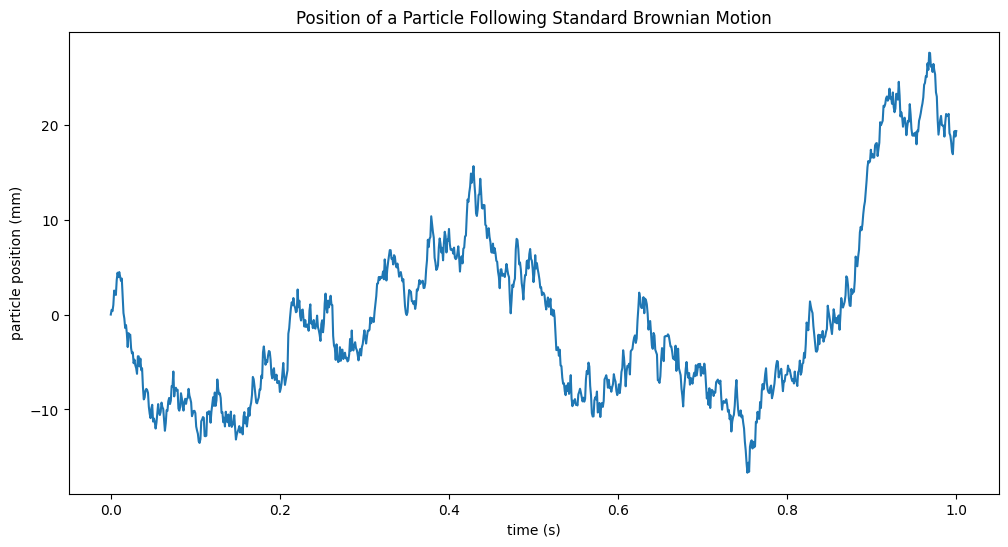

In [15]:
# larger version of the upper left plot above
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.plot(time, pos)
ax1.set_xlabel("time (s)")
ax1.set_ylabel("particle position (mm)")
ax1.set_title("Position of a Particle Following Standard Brownian Motion")

if save_plots:
    plt.savefig(output_path + "/brownian-motion/one-plot.png")
if show_plots:
    plt.show()